In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.units as u
from astropy.constants import c
import numpy as np
from lf_utils import *
from GalGroup import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
hdul = fits.open(r"E:\PhD\Jon\GAMA data\gkvScienceCatv02.fits")
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

hdul2 = fits.open(r"E:\PhD\Jon\GAMA data\gkvInputCatv02_reduced.fits")
data2 = hdul2[1].data
t2=Table(data2)
dfFiber = t2.to_pandas()

In [3]:
df = df[df['SC']>=7]

In [4]:
df = pd.merge(df, dfFiber[['uberID', 'mag_app_Zt']], on='uberID', how='left')
df = df.rename(columns={"mag_app_Zt": "FIBERMAG_R"})
df = add_column(df, column_file = r"E:\PhD\Jon\GAMA data\TilingCatv46.fits", column_name = 'VEL_ERR', common_column = 'CATAID')
df = add_column(df, column_file = r"E:\PhD\Jon\GAMA data\G23TilingCatv11.fits", column_name = 'VEL_ERR', common_column = 'CATAID')
df = calc_z_comp(df, search_radius=1.0, NQ_col='NQ', z_col='Z', ra_col='RAcen', dec_col='Deccen', H0=100, Om0=0.25, Ode0=0.75)
print(f"Mean velocity error : {df['VEL_ERR'].mean()}")
df['VEL_ERR'] = df['VEL_ERR'].fillna(df['VEL_ERR'].mean())
# df = add_column(df, column_file = r"E:\PhD\Jon\GAMA data\SFMPhotoZv01.fits", column_name = 'zmax', common_column = 'uberID')
# df.loc[df['NQ'] < 3, 'Z'] = df.loc[df['NQ'] < 3, 'zmax']
# df.loc[df['NQ'] < 3, 'NQ'] = 10
# df['z_comp'] = np.ones(len(df))
# print(len(df[df['NQ']==10]))

Calculating completeness:   0%|          | 0/197723 [00:00<?, ?it/s]

Mean velocity error : 35.760101318359375


In [5]:
df = df[(df['Z']>=0.002) & (df['Z']<0.65) & (df['NQ']>=3) & (df['flux_rt']+df['flux_err_rt'] > 0)]

In [6]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,mask,starmask,uberclass,CATAID,SC,Z,NQ,FIBERMAG_R,VEL_ERR,z_comp
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,False,False,1,3600151,8,0.08185,4,18.345509,36.376244,0.985294
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,False,False,1,3874273,7,0.30551,4,20.691059,26.069448,1.000000
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,False,False,1,3600249,8,0.28994,4,19.311277,47.472672,1.000000
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,False,False,1,3600327,7,0.27092,4,20.822168,32.564651,1.000000
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,False,False,1,3600321,7,0.29026,4,20.905251,27.056568,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205534,350701200401914,350.164514,-30.601506,350.164507,-30.601577,350.164538,-30.601614,-4.535786e-13,4.038970e-12,-0.184533,...,False,False,1,5348929,8,0.20451,4,19.209547,85.000000,1.000000
205536,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,False,False,1,5350314,8,0.37250,4,19.997862,28.316683,1.000000
205537,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,False,False,1,5350126,8,0.08021,4,20.519758,24.071516,0.988889
205538,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,False,False,1,5348928,8,0.16611,4,20.451103,28.800415,1.000000


c:\Users\adrie\Code\Jon current work\kcorr.py:32: RuntimeWarning: divide by zero encountered in power
  ivar[:, i] = flux_err[:, i]**-2


Fixed  29414 missing fluxes
Replacing 29 bad fits with mean


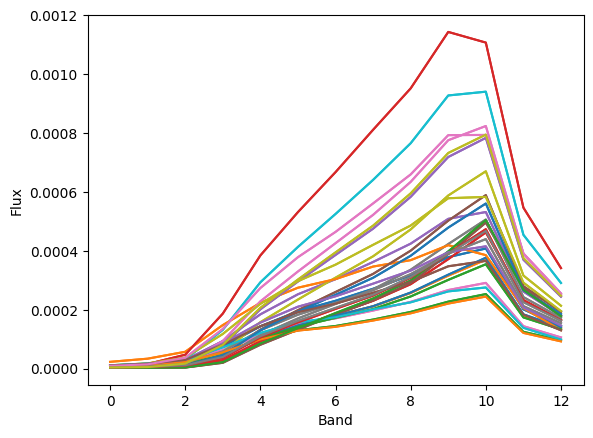

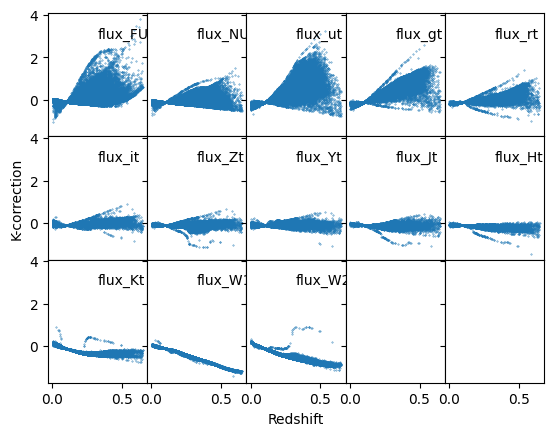

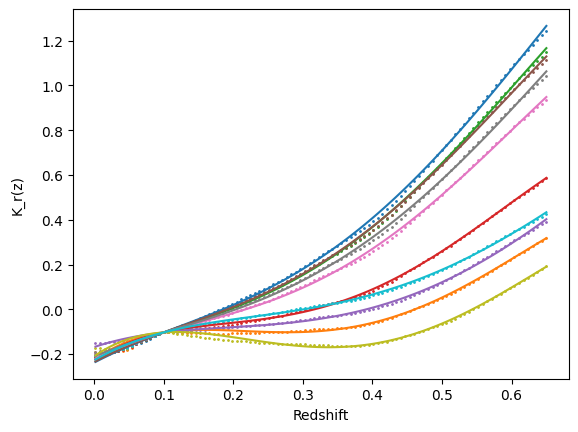

In [7]:
df = kcorrection(df, zrange=[0.002, 0.65], z0=0.1, 
                 responses = ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 
                              'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
                 fnames = ['flux_FUVt', 'flux_NUVt', 'flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt', 'flux_Yt', 
                           'flux_Jt', 'flux_Ht', 'flux_Kt', 'flux_W1t', 'flux_W2t'], 
                 ferrnames = ['flux_err_FUVt', 'flux_err_NUVt', 'flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 
                              'flux_err_Zt', 'flux_err_Yt', 'flux_err_Jt', 'flux_err_Ht', 'flux_err_Kt', 'flux_err_W1t', 
                              'flux_err_W2t'], 
                 ref_index = 4, avg_index = 6, redshift='Z', survey='GAMAIII')

In [8]:
df = luminosity_distance(df, redshift='Z', H0=100, Om0=0.25, Ode0=0.75)
df = magnitude(df, bands=['FUV', 'NUV', 'u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'K', 'W1', 'W2'], 
               fluxbands=['flux_FUVt', 'flux_NUVt', 'flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt', 'flux_Yt', 
                          'flux_Jt', 'flux_Ht', 'flux_Kt', 'flux_W1t', 'flux_W2t'])

c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr

In [9]:
df = df[df['m_r']<19.65]

In [10]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,m_J,M_J,m_H,M_H,m_K,M_K,m_W1,M_W1,m_W2,M_W2
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,16.137997,-20.848947,15.852398,-21.127320,15.966095,-21.044989,16.691135,-20.310958,17.354012,-19.677614
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,18.963661,-21.094000,18.711105,-21.336251,18.613232,-21.295085,18.826244,-20.873445,19.631165,-20.163611
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,16.997986,-22.985587,16.541756,-23.408018,16.432434,-23.278540,17.192163,-22.443143,17.607738,-21.965427
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,18.570415,-21.186373,18.297937,-21.466165,18.088036,-21.487581,19.016796,-20.474142,19.342688,-20.123227
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,18.525414,-21.383577,18.360033,-21.540064,18.107611,-21.615685,19.007612,-20.615993,19.541065,-20.063020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192910,350701200401914,350.164514,-30.601506,350.164507,-30.601577,350.164538,-30.601614,-4.535786e-13,4.038970e-12,-0.184533,...,16.972328,-22.106646,16.774654,-22.332864,16.684483,-22.254365,17.518353,-21.441143,17.897804,-20.975256
192911,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,18.353712,-22.218591,18.204178,-22.330101,17.821030,-22.603822,18.477543,-21.633436,18.762568,-21.377112
192912,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,18.717346,-18.233623,18.391273,-18.555972,18.594070,-18.376058,19.424576,-17.539579,20.055471,-16.933689
192913,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,17.727613,-20.869964,17.484238,-21.140496,17.389299,-21.116061,18.334656,-20.202297,18.629602,-19.829711


In [11]:
df.to_pickle(r"E:\PhD\Jon\pickle datafiles\GAMAIII_group_gals_dataframe.pkl")

In [12]:
import pandas as pd
df = pd.read_pickle(r"E:\PhD\Jon\pickle datafiles\GAMAIII_group_gals_dataframe.pkl")
from GalGroup import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [13]:
df, groups = find_groups(df, mlims=(0, 19.65), Mlims=(-24, -12), m_col='m_r', M_col='M_r', z_col='Z', ra_col='RAcen', dec_col='Deccen', 
                         velerr_col='VEL_ERR', z_comp_col='z_comp', galid_col = 'uberID', 
                         H0=100, Om0=0.3, Ode0=0.7, M_star=-20.71, alpha=-1.26, phi=10**(-2.02), 
                         delta=9, r_delta=1.5, l_delta=12, b0=0.06, R0=18, E_b=-0.00, E_r=-0.02, nu=0.63)

45 galaxies filtered out
Processing 192870 galaxies ...
Calculating mean comoving galaxy separation and comoving radial distance ...


  0%|          | 0/192870 [00:00<?, ?it/s]

147 galaxies had their D_lim value clipped at 100 Mpc
Calculating mean required linking overdensity and radial expansion factor ...


0it [00:00, ?it/s]

  0%|          | 0/192870 [00:00<?, ?it/s]

Finding groups ...


  0%|          | 0/192870 [00:00<?, ?it/s]

In [14]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,D_lim,D_com,rho_bar,rho_emp,b,R,b_comp,anglink,loslink,GroupID
0,218000342410709,218.260906,0.925023,218.260961,0.925051,218.260933,0.925024,-3.518357e-13,3.721855e-12,-0.231761,...,1.439612,6.652665,0.069558,0.624831,0.06,18.000686,0.060148,0.013015,1.558677,0
1,183010388904067,183.217235,1.299655,183.217202,1.299605,183.217165,1.299575,-3.599144e-14,4.652500e-12,-0.211072,...,2.383827,12.310420,0.008045,0.660198,0.06,17.221624,0.060142,0.011646,2.469047,0
2,185000770103133,184.857804,0.212483,184.858186,0.211663,184.858149,0.211634,-7.042074e-13,4.722086e-12,-0.190169,...,1.543098,8.328789,0.054519,0.589463,0.06,17.934082,0.060145,0.011143,1.664464,1
3,185000525704774,185.088779,0.367491,185.088330,0.366189,185.088293,0.366160,-4.422210e-13,4.519107e-12,-0.190169,...,1.653051,9.317614,0.041064,0.554095,0.06,17.854794,0.060150,0.010671,1.775322,1
4,184000108205558,184.484313,0.435233,184.481477,0.440000,184.481440,0.439971,1.432374e-13,4.334999e-12,-0.212938,...,1.718083,9.706853,0.034734,0.577673,0.06,17.780289,0.060148,0.010646,1.837416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192865,136000896407415,135.739277,0.614903,135.739240,0.614877,135.739224,0.614858,-1.092210e-13,3.798103e-12,-0.216343,...,5.746982,712.302694,0.000131,0.011789,0.06,17.190646,0.060000,0.000484,5.927660,0
192866,215011002007823,214.639592,1.653282,214.639669,1.653270,214.639640,1.653243,-2.882846e-13,3.863045e-12,-0.186294,...,4.930309,611.340168,0.000273,0.082525,0.06,16.778758,0.060000,0.000484,4.963468,23507
192867,136000903807035,135.732300,0.579059,135.732273,0.579094,135.732257,0.579075,9.428743e-14,3.606870e-12,-0.216343,...,6.650713,836.514454,0.000064,0.200417,0.06,16.010653,0.060000,0.000477,6.388936,9405
192868,215010984307416,214.656346,1.614916,214.656348,1.614948,214.656320,1.614921,-2.329093e-13,3.851325e-12,-0.186294,...,5.591893,706.914476,0.000150,0.011789,0.06,17.235687,0.060000,0.000475,5.782807,0


In [15]:
groups

,GroupID,N,GalCen,RA,Dec,z,vel_disp,rad50,dyn_mass,lum,Gals,GalCenID,Gals_id
0,1,3,4,184.484313,0.435233,0.00324,94.703522,0.063214,1.318214e+12,1.244158e+08,"{2, 3, 4}",184000108205558,"[185000770103133, 185000525704774, 18400010820..."
1,2,2,7,340.575609,-30.057124,0.00415,25.305208,0.023527,3.502859e+10,1.366833e+09,"{43, 7}",339700458107700,"[339700325705927, 339700458107700]"
2,3,4,15,221.101441,1.680516,0.00519,244.953609,0.041612,5.805264e+12,4.727673e+09,"{47, 85, 37, 15}",221010511408105,"[221010635507301, 221011019306200, 22101048340..."
3,4,2,16,221.546731,-0.222963,0.00554,0.000000,0.034725,0.000000e+00,5.300923e+09,"{16, 57}",221991101209137,"[221991101209137, 220990283709813]"
4,5,17,18,343.522175,-30.592604,0.24139,1791.118165,2.254528,1.681679e+16,1.143524e+12,"{112096, 89856, 178818, 134725, 180776, 100987...",343700965302015,"[343700689602929, 343690809011789, 34370121250..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26358,26359,2,191771,214.722069,2.271320,0.23682,109.793843,0.028939,8.111201e+11,3.129198e+10,"{192121, 191771}",215020490003767,"[215020486703725, 215020490003767]"
26359,26360,2,192022,217.085869,2.097853,0.23536,193.183709,0.015499,1.344843e+12,3.004129e+10,"{192434, 192022}",217020103801925,"[217020101201916, 217020103801925]"
26360,26361,2,192423,340.598021,-31.350828,0.22687,92.030352,0.040094,7.895457e+11,2.474615e+10,"{192815, 192423}",339690258504587,"[339690265804609, 339690258504587]"
26361,26362,2,192709,175.515396,1.746808,0.26769,37.993316,0.122516,4.111925e+11,4.439044e+10,"{192595, 192709}",175010072408817,"[176011144508985, 175010072408817]"


In [16]:
print(f"Number of ungrouped galaxies : {len(df[df['GroupID']==0])}, ie. {round(100 * len(df[df['GroupID']==0])/len(df), 2)}%")
print(f"Number of galaxies with local redshift completeness > 95% : {len(df[df['z_comp']>0.95])}")
print(f"Number of groups with more than 5 members : {len(groups[groups['N']>5])}")
print(f"Number of groups with velocity dispersion = 0 (ie. error > value) : {len(groups[groups['vel_disp']==0])}")
print(f"Number of groups with velocity dispersion > 2500 km.s^-1 : {len(groups[groups['vel_disp']>2500])}")

Number of ungrouped galaxies : 109794, ie. 56.93%
Number of galaxies with local redshift completeness > 95% : 179152
Number of groups with more than 5 members : 2144
Number of groups with velocity dispersion = 0 (ie. error > value) : 2387
Number of groups with velocity dispersion > 2500 km.s^-1 : 26


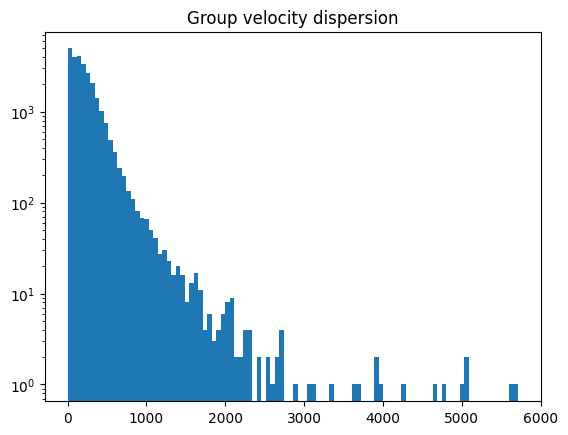

In [17]:
plt.hist(groups['vel_disp'], bins=100)
plt.yscale('log')
plt.title('Group velocity dispersion')
plt.show()

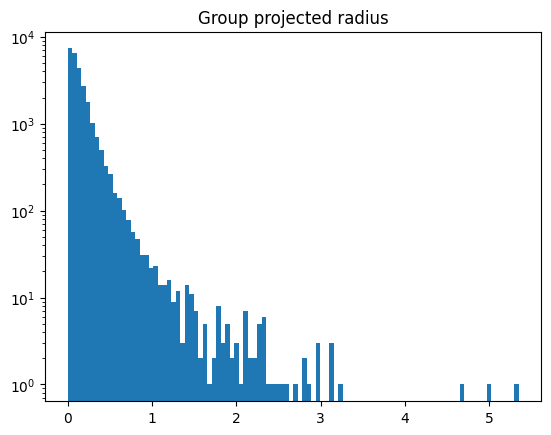

In [18]:
plt.hist(groups['rad50'], bins=100)
plt.yscale('log')
plt.title('Group projected radius')
plt.show()

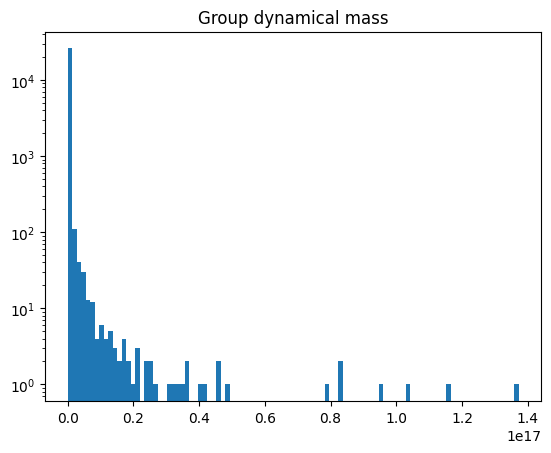

In [19]:
plt.hist(groups['dyn_mass'], bins=100)
plt.yscale('log')
plt.title('Group dynamical mass')
plt.show()

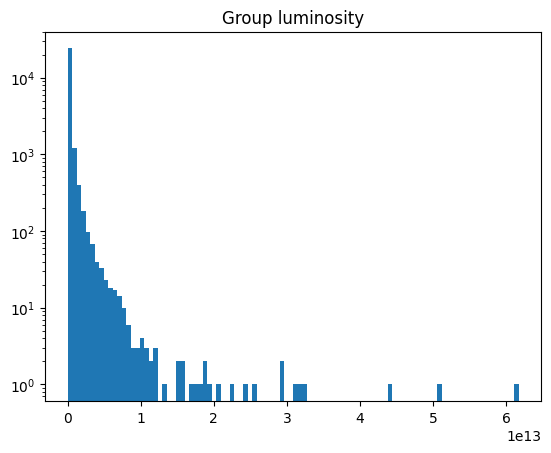

In [20]:
plt.hist(groups['lum'], bins=100)
plt.yscale('log')
plt.title('Group luminosity')
plt.show()

In [21]:
groups[groups['vel_disp']>2500]

,GroupID,N,GalCen,RA,Dec,z,vel_disp,rad50,dyn_mass,lum,Gals,GalCenID,Gals_id
53,54,8,174,339.699633,-31.303092,0.43212,2711.898857,2.692522,4.604104e+16,7.218590e+12,"{17095, 10217, 17739, 18669, 22734, 174, 18491...",339691073805089,"[339691076604820, 339691164806240, 33969121610..."
57,58,5,186,182.339752,-1.735728,0.45036,2671.233252,2.084026,3.457527e+16,6.434736e+12,"{38638, 6806, 186, 1500, 13210}",181980258903692,"[181980416603582, 182981236504295, 18198025890..."
65,66,3,198,212.611576,2.148984,0.46730,3080.757911,1.626592,3.589491e+16,5.474437e+12,"{3250, 28658, 198}",213020607202468,"[213020541104292, 213020650803167, 21302060720..."
67,68,2,203,178.001974,1.459811,0.46963,4985.279314,1.436949,8.303466e+16,4.513680e+12,"{5872, 203}",178010616405769,"[178010692404527, 178010616405769]"
73,74,2,217,131.145719,0.921645,0.43929,3615.401400,1.111854,3.379091e+16,2.513941e+12,"{217, 30818}",131010464700053,"[131010464700053, 131000449609503]"
74,75,2,218,217.435977,0.251937,0.45269,3907.818965,1.191115,4.229231e+16,3.150265e+12,"{218, 15166}",217000156003562,"[217000156003562, 217000071002674]"
78,79,2,234,138.935632,-0.455424,0.51057,5069.088983,1.588887,9.492745e+16,7.677411e+12,"{234, 4653}",138990687906666,"[138990687906666, 138990761505376]"
87,88,2,250,221.976003,-0.955452,0.52597,3998.615016,1.310408,4.871521e+16,1.146017e+13,"{250, 1101}",221980645011978,"[221980645011978, 221980702511010]"
88,89,6,252,178.059069,0.524221,0.46666,2550.532860,0.251566,3.804981e+15,8.493618e+12,"{3557, 55720, 2827, 7029, 25755, 252}",178000556706451,"[178000712006315, 178000639905200, 17800054920..."
89,90,2,253,218.561478,0.762968,0.50128,5080.513826,0.759776,4.559739e+16,6.553026e+12,"{4777, 253}",219001085108989,"[218000007009693, 219001085108989]"


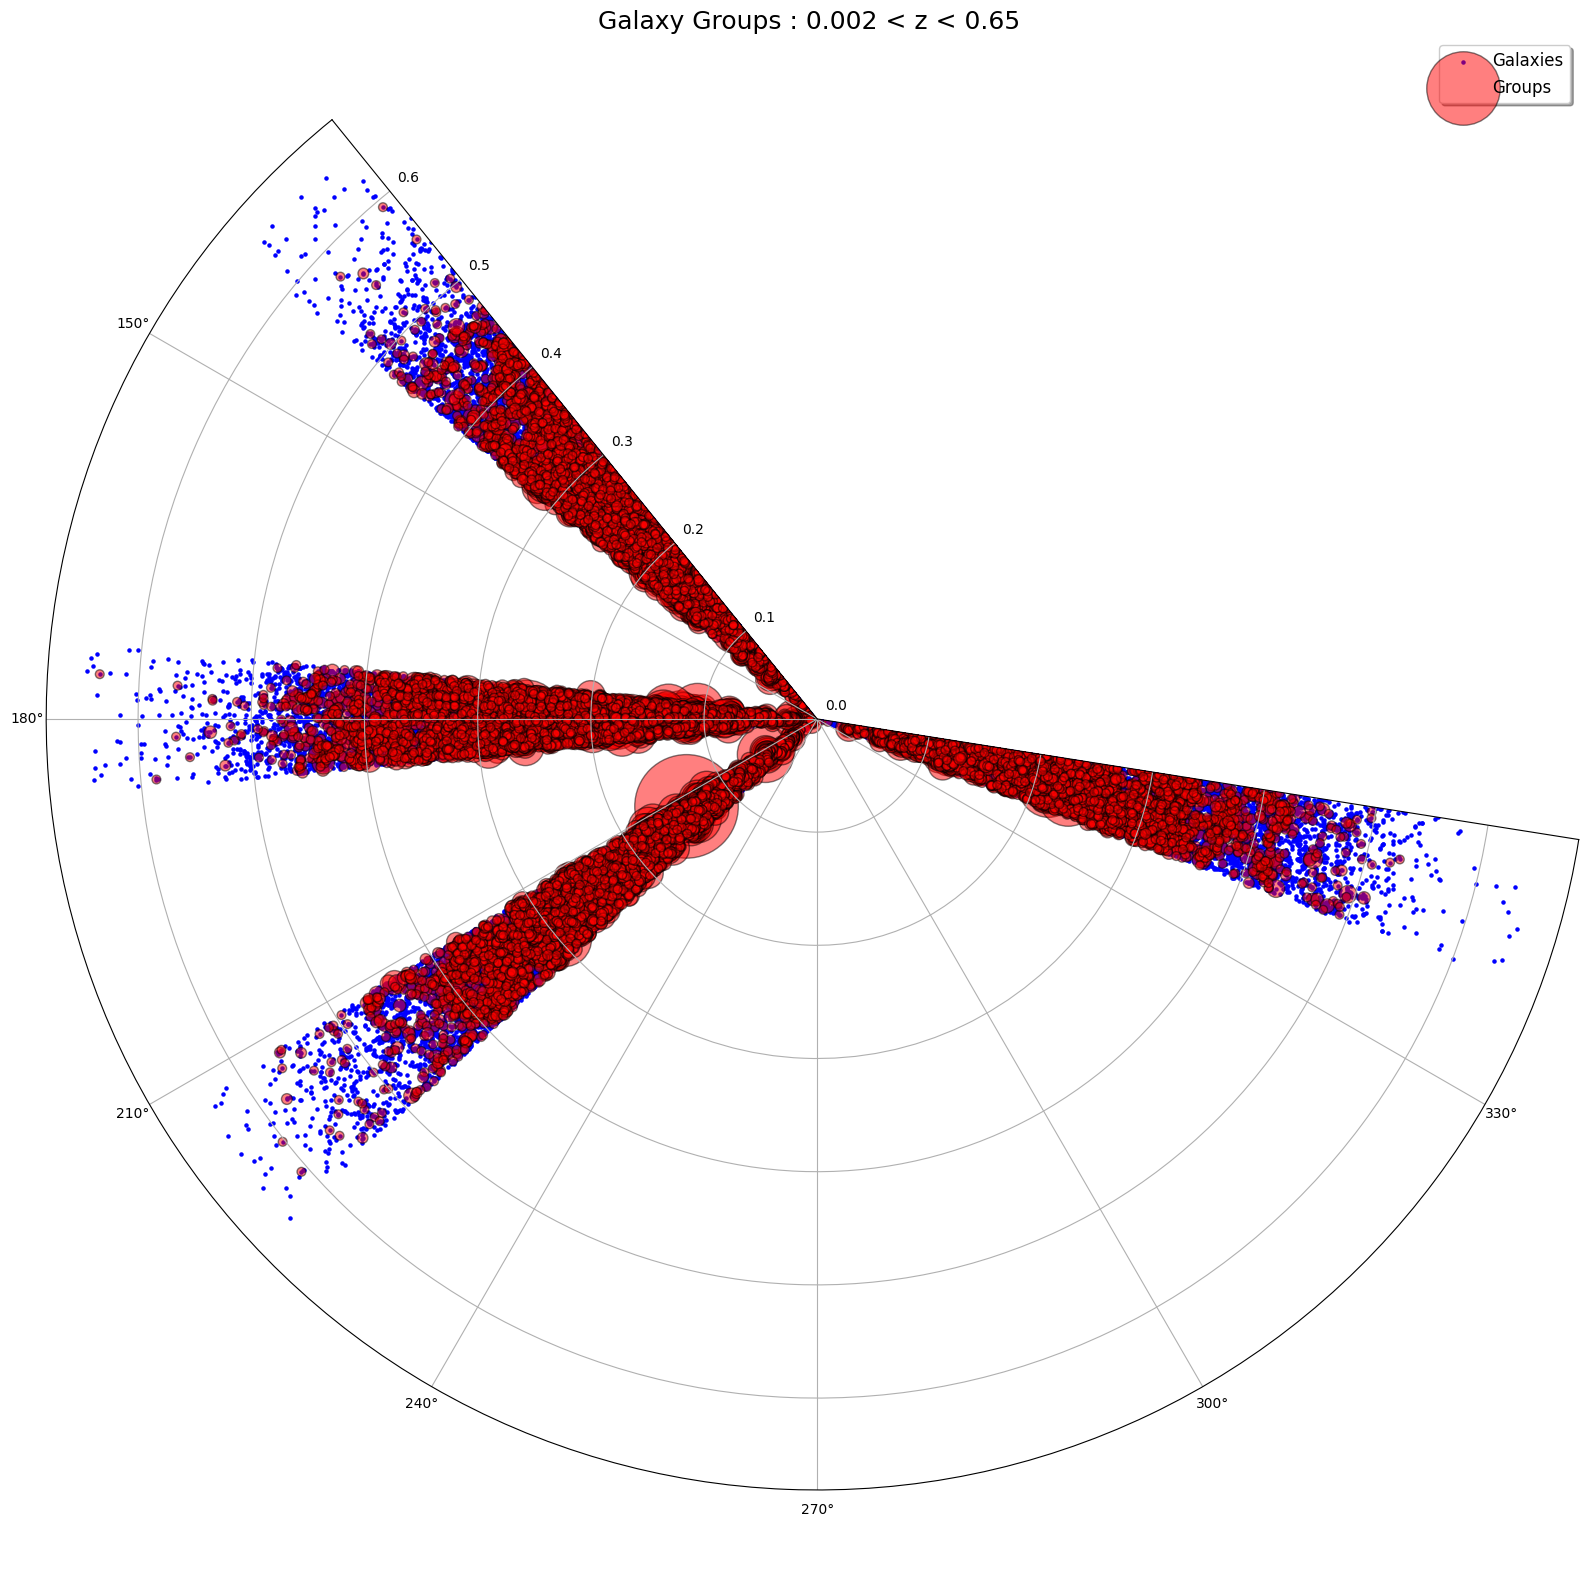

In [22]:
plot_galaxy_groups(df, groups)